## PCA Dimensionality Reduction on High-Dimensional Battery Feature Dataset

### 1. Data Preprocessing

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
battery_df = pd.read_csv('data/battery_data.csv')
battery_df.set_index('cell_id', inplace=True)
battery_df.head()

EOL  QdMean_0_2  QdMedian_0_2  QdMinimum_0_2  QdMaximum_0_2  \
cell_id                                                                 
b1c0     1851   -2.768065     -2.764015      -2.096568      -2.496553   
b1c1     2159   -3.294278     -2.985559      -2.585566      -2.358308   
b1c2     2236   -2.838666     -2.827517      -2.134373      -3.417597   
b1c3     1433   -3.050760     -3.058096      -2.211112      -3.068143   
b1c4     1708   -3.489631     -3.717999      -2.978724      -2.273311   

         QdStandard Deviation_0_2  QdSkewness_0_2  QdKurtosis_0_2  \
cell_id                                                             
b1c0                    -2.833587        0.160945        0.642067   
b1c1                    -2.851505        0.250739        0.492321   
b1c2                    -2.969096       -0.024529        0.417719   
b1c3                    -2.986278        0.352704        0.928040   
b1c4                    -3.062273        0.277435        0.701137   

         QdVariance_0_2  QdValue at minimum_0_2  ...  DischargeTime_21  \
cell_id                                          ...                     
b1c0          -5.665166               -5.065817  ...         72056.268   
b1c1          -5.700829               -6.100330  ...         72031.374   
b1c2          -5.934450               -5.878698  ...         72057.552   
b1c3          -5.968506               -6.375640  ...         72036.186   
b1c4          -6.118810               -5.663381  ...         72037.620   

         DischargeTime_22  DischargeTime_23  DischargeTime_24  \
cell_id                                                         
b1c0            72057.366         72058.632         72028.014   
b1c1            72032.280         72033.510         72032.382   
b1c2            72058.878         72028.968        144036.324   
b1c3            72036.504         72036.654         72037.674   
b1c4            72037.950         72038.226         72037.482   

         DischargeTime_25  DischargeTime_26  DischargeTime_27  \
cell_id                                                         
b1c0            72028.182        144037.776         72029.226   
b1c1            72032.676         72031.296         72032.562   
b1c2           144037.176        144037.014         72028.152   
b1c3           144045.918         72037.332         72037.410   
b1c4           144047.214         72038.712         72037.788   

         DischargeTime_28  DischargeTime_29  DischargeTime_30  
cell_id                                                        
b1c0            72029.010         72029.154         72029.166  
b1c1            72031.662         72032.622         72031.848  
b1c2           147690.480         72028.974         72028.158  
b1c3            72036.750        144046.110        144046.734  
b1c4           144048.420         72039.852        144048.852  

[5 rows x 22659 columns]

In [4]:
print('Total features in raw dataset:', battery_df.drop('EOL', axis=1).shape[1]) # (total features in raw dataset:) EOL is the target variable
print("Total samples in raw dataset:", battery_df.shape[0])

Total features in raw dataset: 22658
Total samples in raw dataset: 168


In [5]:
from sklearn.preprocessing import StandardScaler

# Standardize features
features = battery_df.drop('EOL', axis=1)
X = StandardScaler().fit_transform(features)
print("Standardized features shape:", X.shape)

Standardized features shape: (168, 22658)


In [6]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X)

# Explained variance ratio
explained_var = pca.explained_variance_ratio_
cumulative_var = explained_var.cumsum()

Text(0, 0.5, 'PC2 (8.0% var)')

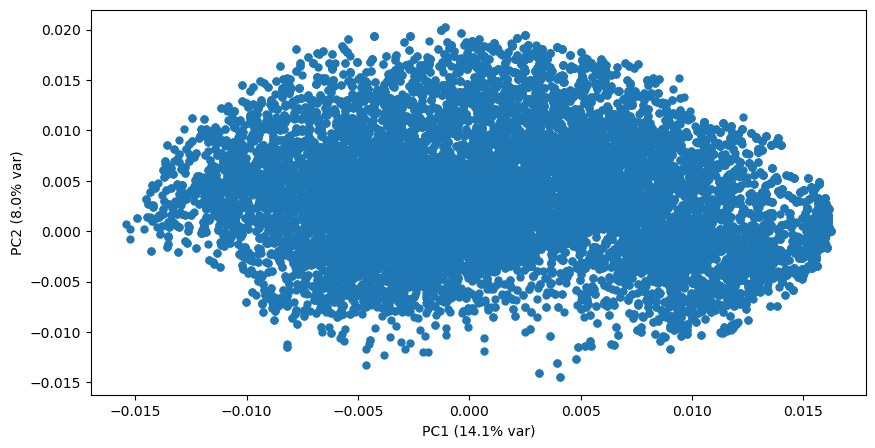

In [7]:
## plot for PC1 vs PC2 visulaization
evr = explained_var

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(pca.components_[0], pca.components_[1], 'o', markersize=5)
ax.set_xlabel(f"PC1 ({evr[0]*100:.1f}% var)")
ax.set_ylabel(f"PC2 ({evr[1]*100:.1f}% var)")


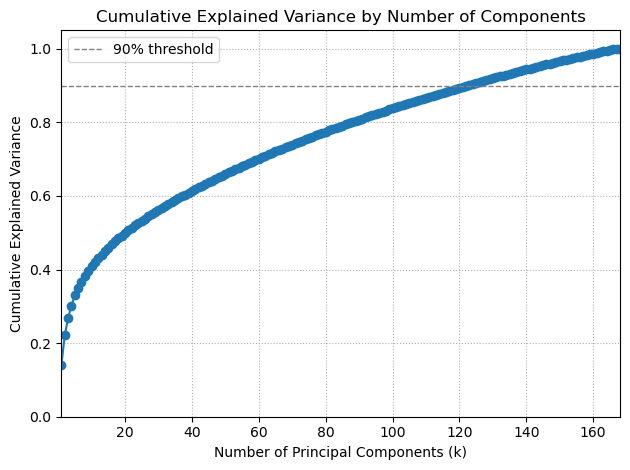

Number of components to explain 90.0% variance: 123


In [8]:
# --- Plot cumulative explained variance (3x1) ---
fig, ax = plt.subplots()
xs = np.arange(1, len(explained_var)+1)
cum = cumulative_var 

tau = 0.9  # threshold can be even 0.95
k_tau = np.argmax(cum >= tau) + 1

ax.plot(xs, cum, marker="o", linewidth=1.5)
ax.axhline(tau, linestyle="--", linewidth=1.0, color="gray", label=f"{int(tau*100)}% threshold")
ax.set_ylim(0, 1.05)
ax.set_xlim(1, len(cum))
ax.set_xlabel("Number of Principal Components (k)")
ax.set_ylabel("Cumulative Explained Variance")
ax.set_title('Cumulative Explained Variance by Number of Components')
ax.grid(True, linestyle=":", linewidth=0.8)
ax.legend()


fig.tight_layout()
plt.show()


n_components_tau = np.argmax(cumulative_var >= tau) + 1
print(f"Number of components to explain {tau*100}% variance:", n_components_tau)

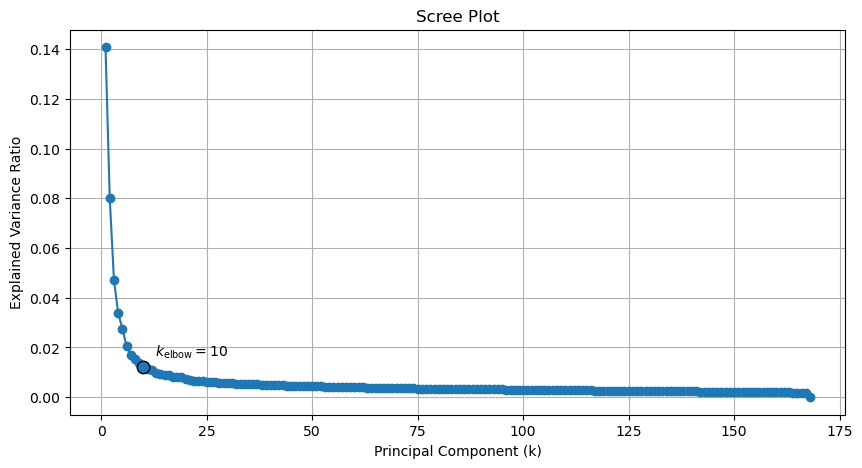

Principal Component (k) by elbow from scree plot: 10
Explained variance ratio unitl elbow point:0.409


In [9]:
## Scree plot 

def elbow_index_max_distance(y):
    """
    Heuristic elbow finder:
    - x = 1..n
    - y = sequence (e.g., explained_variance_ratio_)
    - Returns 0-based index of the point with maximum perpendicular distance
      to the line between (1, y1) and (n, yn).
    """
    n = len(y)
    x = np.arange(1, n + 1)

    # line from (x1,y1) to (xn,yn)
    x1, y1 = x[0], y[0]
    x2, y2 = x[-1], y[-1]

    # distances from each (xi, yi) to the line
    # formula for point-line distance in 2D
    num = np.abs((y2 - y1) * x - (x2 - x1) * y + x2*y1 - y2*x1)
    den = np.sqrt((y2 - y1)**2 + (x2 - x1)**2)
    dist = num / (den + 1e-12)

    return int(np.argmax(dist))

ei = elbow_index_max_distance(evr)
k_elbow = ei + 1

plt.figure(figsize=(10,5))
plt.plot(xs, evr, marker='o')
plt.scatter([k_elbow], [evr[ei]], s=80, edgecolor="black", zorder=3)
plt.annotate(rf"$k_{{\text{{elbow}}}}={k_elbow}$",
              (k_elbow, evr[ei]),
              textcoords="offset points", xytext=(8, 8))
plt.xlabel('Principal Component (k)')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

print("Principal Component (k) by elbow from scree plot:", k_elbow)
print(f"Explained variance ratio unitl elbow point:{cum[ei]:.3f}")

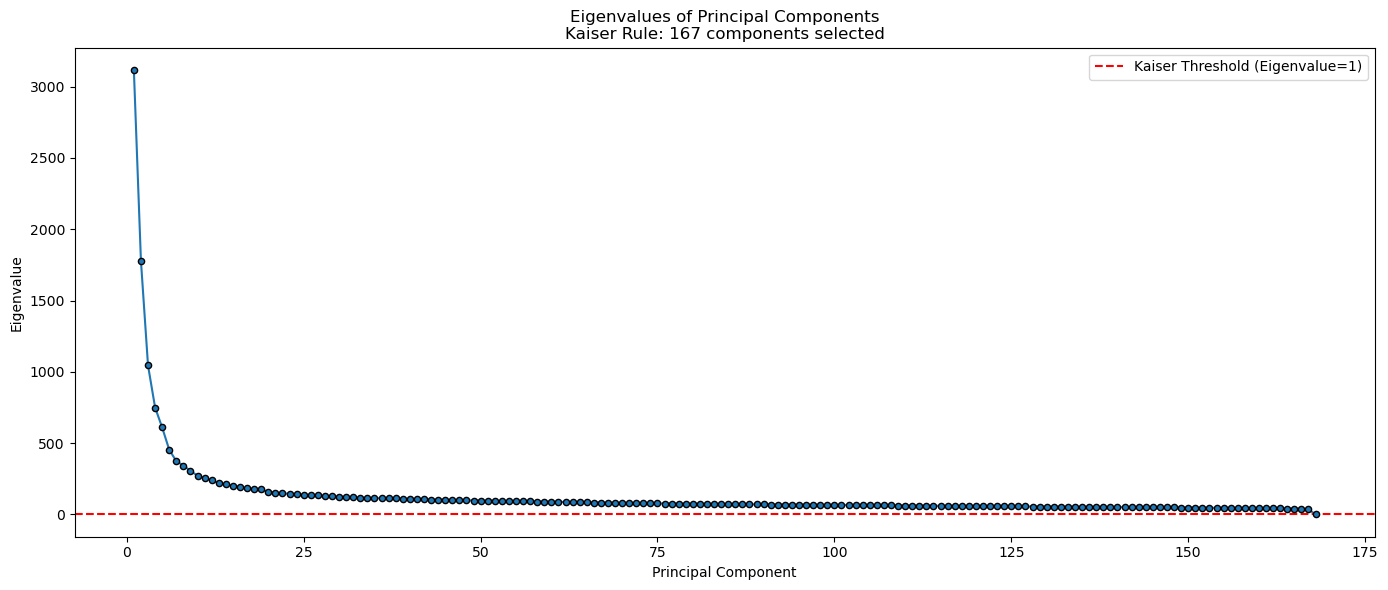

Number of components selected by Kaiser Rule (eigenvalue > 1): 167
Total number of components: 168


In [11]:
## kaisers rule : Keep PCs with eigenvalue > 1

import seaborn as sns


eigenvalues = pca.explained_variance_
num_kaiser = np.sum(eigenvalues > 1) 

plot_df = pd.DataFrame({
    'Principal Component': xs,
    'Eigenvalue': eigenvalues
})


plt.figure(figsize=(14, 6))
# sns.barplot(x='Principal Component', y='Eigenvalue', data=plot_df, color='royalblue')
plt.scatter(xs, eigenvalues, s=20, edgecolor="black", zorder=3)
plt.plot(xs, eigenvalues)
plt.axhline(1, color='red', linestyle='--', label='Kaiser Threshold (Eigenvalue=1)')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.title(f'Eigenvalues of Principal Components\nKaiser Rule: {num_kaiser} components selected')
plt.legend()
plt.tight_layout()
plt.show()

print(f'Number of components selected by Kaiser Rule (eigenvalue > 1): {num_kaiser}')
print(f"Total number of components: {len(eigenvalues)}")



In [32]:
## Final results 

print(f"Total number of components: {len(eigenvalues)}")
print(f"Number of components to explain {tau*100}% variance:", n_components_tau)
print(f"Principal Component (k) by elbow from scree plot:", k_elbow)
print(f"Number of components selected by Kaiser Rule (eigenvalue > 1): {num_kaiser}")


Total number of components: 168
Number of components to explain 90.0% variance: 123
Principal Component (k) by elbow from scree plot: 10
Number of components selected by Kaiser Rule (eigenvalue > 1): 167


## Validating with simple linear regression model

In [33]:
features_tau = features.iloc[:, :n_components_tau]
features_elbow = features.iloc[:, :k_elbow]
features_kaiser = features.iloc[:, :num_kaiser]

print(features_tau.shape, features_elbow.shape, features_kaiser.shape)

(168, 123) (168, 10) (168, 167)


Elbow:
  R-squared TRAIN: 0.267
  R-squared TEST:  -0.555
Kaiser:
  R-squared TRAIN: 1.000
  R-squared TEST:  -21.656
Tau:
  R-squared TRAIN: 0.949
  R-squared TEST:  -14.682


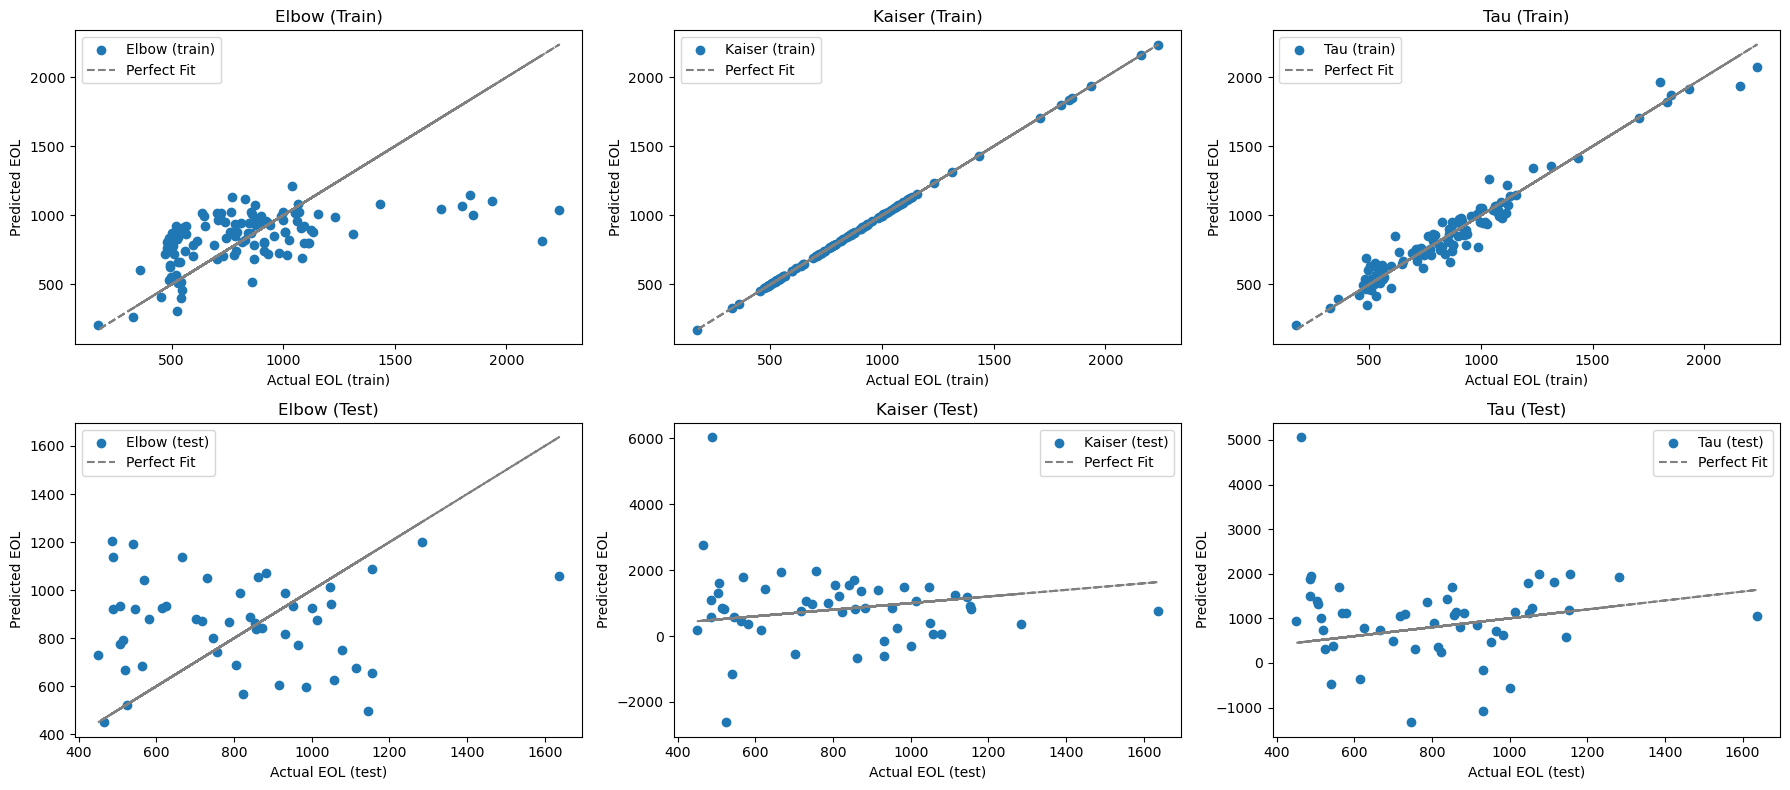

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression



battery_df['EOL_bins'] = pd.qcut(battery_df['EOL'], q=10, duplicates='drop', labels=False)

# Stratified splitting based on EOL_bins for each feature set
X_elbow_train, X_elbow_test, y_train, y_test = train_test_split(
    features_elbow, battery_df['EOL'], test_size=0.3, random_state=42, 
    stratify=battery_df['EOL_bins']
)
X_kaiser_train, X_kaiser_test = train_test_split(
    features_kaiser, test_size=0.3, random_state=42, 
    stratify=battery_df['EOL_bins']
)
X_tau_train, X_tau_test = train_test_split(
    features_tau, test_size=0.3, random_state=42, 
    stratify=battery_df['EOL_bins']
)

# Optionally, drop the extra 'EOL_bins' column after splitting
battery_df.drop('EOL_bins', axis=1, inplace=True)

methods = [
    ("Elbow", X_elbow_train, X_elbow_test),
    ("Kaiser", X_kaiser_train, X_kaiser_test),
    ("Tau", X_tau_train, X_tau_test),
]

fig, axs = plt.subplots(2, 3, figsize=(18, 8))  # 2 rows: train, test

for idx, (name, X_train, X_test) in enumerate(methods):
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    y_train_pred = lr.predict(X_train)
    y_test_pred = lr.predict(X_test)

    r2_train = lr.score(X_train, y_train)
    r2_test = lr.score(X_test, y_test)

    print(f"{name}:")
    print(f"  R-squared TRAIN: {r2_train:.3f}")
    print(f"  R-squared TEST:  {r2_test:.3f}")

    # Plot train set
    axs[0, idx].scatter(y_train, y_train_pred, label=f'{name} (train)')
    axs[0, idx].plot(y_train, y_train, color='gray', linestyle='--', label='Perfect Fit')
    axs[0, idx].set_xlabel('Actual EOL (train)')
    axs[0, idx].set_ylabel('Predicted EOL')
    axs[0, idx].legend()
    axs[0, idx].set_title(f'{name} (Train)')

    # Plot test set
    axs[1, idx].scatter(y_test, y_test_pred, label=f'{name} (test)')
    axs[1, idx].plot(y_test, y_test, color='gray', linestyle='--', label='Perfect Fit')
    axs[1, idx].set_xlabel('Actual EOL (test)')
    axs[1, idx].set_ylabel('Predicted EOL')
    axs[1, idx].legend()
    axs[1, idx].set_title(f'{name} (Test)')

plt.tight_layout()
plt.show()